In [1]:
#Basic face recognizer using pre trained model
# the model was trained on three classes of images..

In [2]:
# importing libraries
import numpy as np
from keras.layers import Input,Dense,Flatten,Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
# setting the directories of the data that will be used
# the train
# the test 
# the validation

train_path = '/content/drive/My Drive/New_ Project/4 images /Train'
test_path = '/content/drive/My Drive/New_ Project/4 images /Test'


In [4]:
#image size fot vgg16 is 224 * 224
image_size = [224,224]

In [5]:
# Adding preprocessing layer to the front of the VGG
vgg = VGG16(input_shape= image_size + [3],weights='imagenet',include_top = False)


58892288/58889256 [==============================] - 3s 0us/step


In [6]:
# not training the existing weights or parameter
for layer in vgg.layers:
  layer.trainable = False


In [7]:
# creating the suitable layer for our model
def create_model(vgg_output,vgg_input,drop,optimizer):
  x = Flatten()(vgg_output)
  #x = Dense(512,activation = 'relu)(x)
  #x = Dropout(drop)(x)
  prediction = Dense(3,activation='softmax')(x)
  model = Model(inputs= vgg_input,outputs=prediction)
  import tensorflow as tf
  #opt = tf.keras.optimizers.Adam(learning_rate=0.1)
  model.compile(loss='categorical_crossentropy',optimizer= optimizer,metrics= ['accuracy'])
  
  return model

In [8]:
# viewing the structure of the model
model = create_model(vgg.output,vgg.input,0,'adam') 
model.summary

<bound method Model.summary of <tensorflow.python.keras.engine.functional.Functional object at 0x7fc5cb3e6b00>>

In [9]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [10]:
train_datagen = ImageDataGenerator(rescale= 1/255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1/255)

In [11]:
training_set = train_datagen.flow_from_directory(train_path,
                                                target_size=(224,244),
                                                batch_size = 32,
                                                class_mode = 'categorical')

Found 493 images belonging to 3 classes.


In [12]:
test_set = test_datagen.flow_from_directory(test_path,
                                          target_size=(224,224),
                                          batch_size= 32,
                                          class_mode = 'categorical')

Found 356 images belonging to 3 classes.


In [13]:
hist = model.fit(training_set,
                validation_data= test_set,
                epochs = 30,
                steps_per_epoch = 15,
                validation_steps = 11,verbose=1)

Epoch 1/30
15/15 [==============================] - 531s 35s/step - loss: 1.8740 - accuracy: 0.4208 - val_loss: 0.9823 - val_accuracy: 0.5739
Epoch 2/30
15/15 [==============================] - 10s 686ms/step - loss: 0.7378 - accuracy: 0.6790 - val_loss: 0.5742 - val_accuracy: 0.7756
Epoch 3/30
15/15 [==============================] - 10s 684ms/step - loss: 0.4526 - accuracy: 0.8416 - val_loss: 0.3970 - val_accuracy: 0.8580
Epoch 4/30
15/15 [==============================] - 10s 676ms/step - loss: 0.3255 - accuracy: 0.8980 - val_loss: 0.4076 - val_accuracy: 0.8466
Epoch 5/30
15/15 [==============================] - 10s 674ms/step - loss: 0.2912 - accuracy: 0.9154 - val_loss: 0.3453 - val_accuracy: 0.8551
Epoch 6/30
15/15 [==============================] - 10s 677ms/step - loss: 0.2478 - accuracy: 0.9306 - val_loss: 0.2499 - val_accuracy: 0.9460
Epoch 7/30
15/15 [==============================] - 10s 691ms/step - loss: 0.2012 - accuracy: 0.9479 - val_loss: 0.2637 - val_accuracy: 0.9290


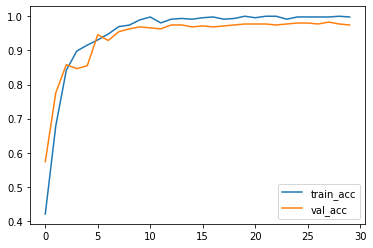

In [14]:
# Accuracy plotting the accuracy and validation accuracy
plt.plot(hist.history['accuracy'],label = 'train_acc')
plt.plot(hist.history['val_accuracy'],label = 'val_acc')
plt.legend()

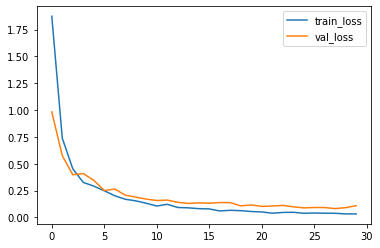

In [15]:
# Loss plotting the loss and the validation loss 
plt.plot(hist.history['loss'],label = 'train_loss')
plt.plot(hist.history['val_loss'],label = 'val_loss')
plt.legend()


In [16]:
from keras.models import load_model

model.save('facefeatures_new_model')


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: facefeatures_new_model/assets


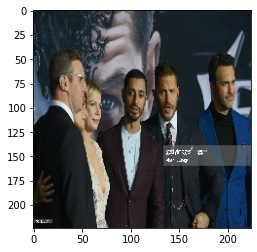

In [161]:
#testing an unseen image .
# dir = path of the image to be tested
#dir = '/content/tom-hardy-actor-attends-/content/gettyimages-1155328229-2048x2048.jpgmad-max-fury-road-photocall-th-annual-cannes-film-festival-may-cannes-france-58038178.jpg'
dir = '/content/gettyimages-1044563410-2048x2048.jpg'
from keras_preprocessing import image 
img = image.load_img(dir,
      target_size=(224,224))

img = np.asarray(img)
plt.imshow(img)

In [162]:
# the index of each image 
training_set.class_indices

{'pins_Chris Evans': 0, 'pins_Robert Downey Jr': 1, 'pins_Tom Hardy': 2}

In [163]:
img = np.expand_dims(img,axis=0)
from keras.models import load_model
saved_model = load_model('facefeatures_new_model')
output = saved_model.predict(img)
print(output)
print(np.argmax(output))
if np.argmax(output) == 2:
  print('Match found ! Tom Hardy')

[[0. 0. 1.]]
2
Match found ! Tom Hardy


In [56]:
# importing cv2 to process the image data
import cv2

In [57]:
# loading cascades
# cascade enables the selection of the frontalface
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [139]:
# cropping the area of the face to be examined
# img should be an array ie from imread or load_image
def face_extractor(img_dir):
  # fuction detects the faces and returns the cropped face
  # if no face detected , it returns the input image 
  dir = img_dir
  from keras_preprocessing import image 
  img = image.load_img(dir,
        target_size=(250,250))
  img = np.asarray(img)
  rgb_img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
  faces = face_cascade.detectMultiScale(img,1.3,5)
  for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    # the location of the parts of the face i
    cropped_face = rgb_img[y:y+h , x:x+w]
    loc = cv2.rectangle(rgb_img,(x,y),(x+w,y+h),(255,0,0),2)
  return (x,y,w,h),loc
   
  #return cropped_face
  



In [59]:
# importing cv2_imshow from google.colab.patches instead of using the cv2.imshow  directly 
# due to it inability in google colab
from google.colab.patches import cv2_imshow

In [170]:
def face_identification(img_dir):
  from keras_preprocessing import image 
  try:
    name = ['Chris Evans','Robert Jr', 'Tom Hardy']
    img = image.load_img(img_dir,
          target_size=(224,224))
    img = np.asarray(img)
    img = np.expand_dims(img,axis=0)
    from keras.models import load_model
    saved_model = load_model('facefeatures_new_model')
    output = saved_model.predict(img)
    loc,crop_rec = face_extractor(img_dir)
    image = crop_rec
    if (output[0][0] > 0.5 ):
        name = name[0]
        cv2.putText(image,name,(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
    elif (output[0][1] > 0.5 ):
      name = name[1]
      cv2.putText(image,name,(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
    elif (output[0][2] > 0.5 ):
      name = name[2]
      cv2.putText(image,name,(25,25),cv2.FONT_HERSHEY_COMPLEX,0.4,(0,255,0),1)
    else:
      name = 'Unknown'
      cv2.putText(image,name,(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
    cv2_imshow(image)
  except :
    pass
    print('Use a valid image with a compatible dimension')


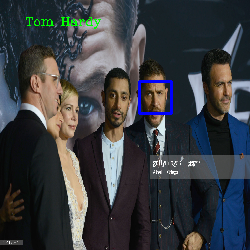

In [173]:
face_identification('/content/gettyimages-1044563410-2048x2048.jpg')

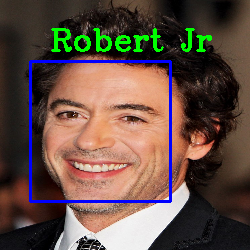

In [174]:
face_identification('/content/Robert-Downey-Jr-2008.jpg')

In [175]:
import os

Use a valid image with a compatible dimension


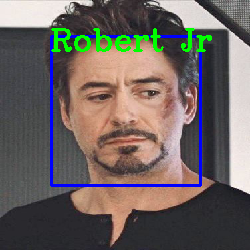

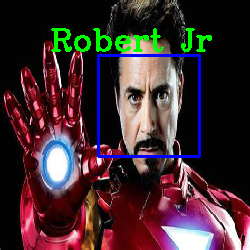

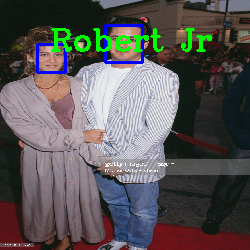

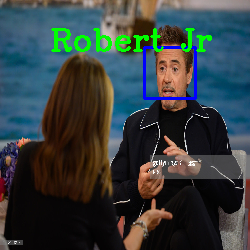

Use a valid image with a compatible dimension
Use a valid image with a compatible dimension


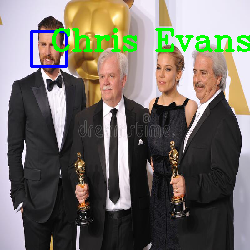

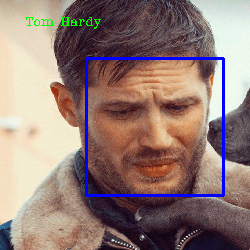

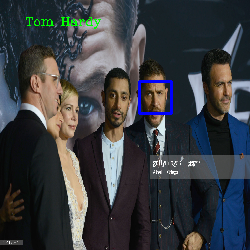

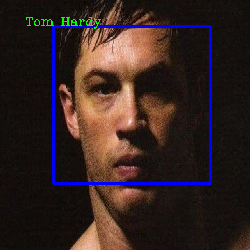

Use a valid image with a compatible dimension
Use a valid image with a compatible dimension


In [181]:
path = '/content/drive/My Drive/4 class'
for img in os.listdir(path):
  image = os.path.join(path,img)
  face_identification(image)



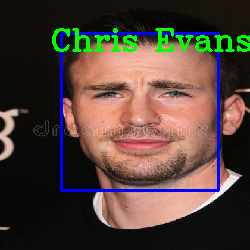

In [178]:
face_identification('/content/chris-evans-hollywood-domino-gala-sunset-tower-hotel-west-hollywood-ca-37285925.jpg')
#comparing the false positive above to thhe one below 
# images of correct dimensions mostly cropped ones gives accurate results.
# getting a quality images is neccessary 

In [180]:
face_identification('/content/chris-evans-los-angeles-ca-february-th-annual-academy-awards-dolby-theatre-hollywood-52527049.jpg')

Use a valid image with a compatible dimension
